## CIFAR 10 Image Classification using CNN ##

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D, MaxPool2D# convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers

In [2]:
# setting class names
class_names=['airplane','automobile','bird', 'cat','deer','dog','frog','horse','ship','truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

In [3]:
x_train.shape

(50000, 32, 32, 3)

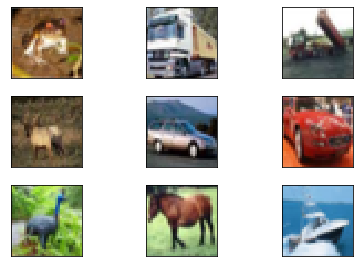

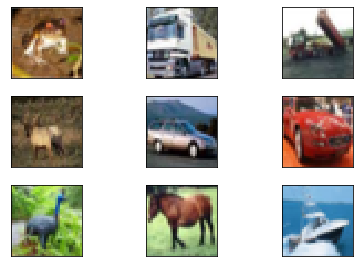

In [4]:
#Printing out some of the images to check the dataset

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
fig

In [5]:
x_train = x_train/255
x_test  = x_test/255

x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape
y_train[0]

array([6], dtype=uint8)

In [54]:
model_1  = tf.keras.models.Sequential() 

layer1 =  Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3])
layer2 =  Conv2D(filters=32,kernel_size=3,padding="same", activation="relu")
layer3 =  MaxPool2D(pool_size=2,strides=2,padding='valid')
layer4 =  Conv2D(filters=64,kernel_size=3,padding="same", activation="relu")
layer5 =  Conv2D(filters=64,kernel_size=3,padding="same", activation="relu")
layer6 =  MaxPool2D(pool_size=2,strides=2,padding='valid')
layer7 = Flatten()
layer8 = Dropout(0.5,noise_shape=None,seed=None)
layer9 = Dense(units=128,activation='relu')
layer10 = Dense(units=10,activation='softmax')



In [55]:
model_1.add(layer1)
model_1.add(layer2)
model_1.add(layer3)
model_1.add(layer4)
model_1.add(layer5)
model_1.add(layer6)
model_1.add(layer7)
model_1.add(layer8)
model_1.add(layer9)
model_1.add(layer10)

In [56]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [57]:
model_1.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [58]:
model_1.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 140s 90ms/step - loss: 1.4429 - sparse_categorical_accuracy: 0.4785
Epoch 2/10
1563/1563 [==============================] - 143s 91ms/step - loss: 1.0321 - sparse_categorical_accuracy: 0.6319
Epoch 3/10
1563/1563 [==============================] - 140s 89ms/step - loss: 0.8803 - sparse_categorical_accuracy: 0.6876
Epoch 4/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.7816 - sparse_categorical_accuracy: 0.7230
Epoch 5/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.7097 - sparse_categorical_accuracy: 0.7486
Epoch 6/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.6510 - sparse_categorical_accuracy: 0.7699
Epoch 7/10
1563/1563 [==============================] - 142s 91ms/step - loss: 0.6043 - sparse_categorical_accuracy: 0.7870
Epoch 8/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.5647 - sparse_categorical_accuracy: 0.8001
Epoch 9/

In [59]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.6942 - sparse_categorical_accuracy: 0.7705


## Transfer Learning Model using VGG16 ##

In [14]:
import tensorflow.keras as K

base_model = K.applications.vgg16.VGG16(include_top = False, weights = 'imagenet', pooling = 'avg')

model_2 = K.Sequential()

model_2.add(K.layers.UpSampling2D())
model_2.add(base_model)
model_2.add(K.layers.Flatten())
model_2.add(K.layers.Dense(512, activation=('relu'))) 
model_2.add(K.layers.Dropout(0.2))
model_2.add(K.layers.Dense(256, activation=('relu')))
model_2.add(K.layers.Dropout(0.2))
model_2.add(K.layers.Dense(10, activation=('softmax')))
callback = []


In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_1 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [15]:
def decay(epoch):
        """ This method create the alpha"""
        return 0.001 / (1 + 1 * 30)
callback += [K.callbacks.LearningRateScheduler(decay, verbose=1)]
callback += [K.callbacks.ModelCheckpoint('cifar10.h5',save_best_only=True, mode='min')]

In [19]:
model_2.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
model_2.fit(x = x_train, y = y_train, batch_size = 128, epochs = 10, shuffle = True)


Epoch 1/10
391/391 [==============================] - 3468s 9s/step - loss: 1.8271 - sparse_categorical_accuracy: 0.2742
Epoch 2/10
391/391 [==============================] - 3564s 9s/step - loss: 1.2715 - sparse_categorical_accuracy: 0.5244
Epoch 3/10
391/391 [==============================] - 3613s 9s/step - loss: 0.9488 - sparse_categorical_accuracy: 0.6652
Epoch 4/10
391/391 [==============================] - 3590s 9s/step - loss: 0.7686 - sparse_categorical_accuracy: 0.7369
Epoch 5/10
391/391 [==============================] - 4079s 10s/step - loss: 0.6468 - sparse_categorical_accuracy: 0.7821
Epoch 6/10
391/391 [==============================] - 4033s 10s/step - loss: 0.5484 - sparse_categorical_accuracy: 0.8163
Epoch 7/10
391/391 [==============================] - 4616s 12s/step - loss: 0.4691 - sparse_categorical_accuracy: 0.8440
Epoch 8/10
391/391 [==============================] - 3472s 9s/step - loss: 0.4135 - sparse_categorical_accuracy: 0.8634
Epoch 9/10
391/391 [=========

In [20]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)

313/313 [==============================] - 137s 436ms/step - loss: 0.6139 - sparse_categorical_accuracy: 0.8181
